# Wigner Representation

### Introduction

This iPython demo will start to give you some intuition for the uncertainty principle and its role in phase space in quantum mechanics. We'll do this by first, exploring squeezed gaussian states; then, we'll plot a Wigner function for a gaussian, and propagate it; and finally propagate a linear combination of the ground and first excited states of the harmonic oscillator.

We'll **review** some of the stuff you've learned so far : 

1. The quantum harmonic oscillator.
2. Uncertainty principle.

And we'll play around with some **new concepts** :

1. Phase space representation.<br><br>

## <i class="fa fa-book"></i> Step 1: Import the required modules.

In [3]:
% pylab inline
import numpy as np
import imp
import pydoc ##this let's us print out the available functions in our library, as well as the documentation
#This is how we'll import our own homemade modules
qworld = imp.load_source('qworld', '../library/quantumWorld.py')
from scipy import integrate

Populating the interactive namespace from numpy and matplotlib


## <i class="fa fa-wrench"></i> Step 2: Gaussian functions and the uncertainty principle.

Let's start by defining a gaussian state in the position representation in the following way
$$\psi_0(x) = \frac{e^{-\frac{x^2}{2 \sigma^2}}}{ \sqrt{\sigma \sqrt{\pi} }}$$

In [4]:
def gaussian_x(x, sigma):
    '''
    Returns a gaussian in the position representation
    INPUT
    -------------------
    x: Scalar or array of positions to compute a gaussian on
    sigma: Standard deviation of the gaussian
    OUTPUT
    -------------------
    Gaussian in the position representation
    '''
    u = x**2/(2.0*sigma**2)
    return np.exp(-u)/np.sqrt(sigma*np.sqrt(np.pi))

Now define a gaussian state in the momentum representation in the following way
$$\psi_0(x) = \frac{\sqrt{\sigma} e^{-\frac{p^2 \sigma^2 }{2}}}{ \sqrt{ \sqrt{\pi} }}$$

In [5]:
def gaussian_p(p, sigma):
    '''
    Returns a gaussian in the position representation
    INPUT
    -------------------
    x: Scalar or array of positions to compute a gaussian on
    sigma: Standard deviation of the gaussian
    OUTPUT
    -------------------
    Gaussian in the position representation
    '''
    u = p**2*sigma**2/(2.0)
    return np.sqrt(sigma)*np.exp(-u)/np.sqrt(np.sqrt(np.pi))

Now, we're going to plot the comparison of the position and momentum gaussians for each sigma in the range [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]. What do you see?

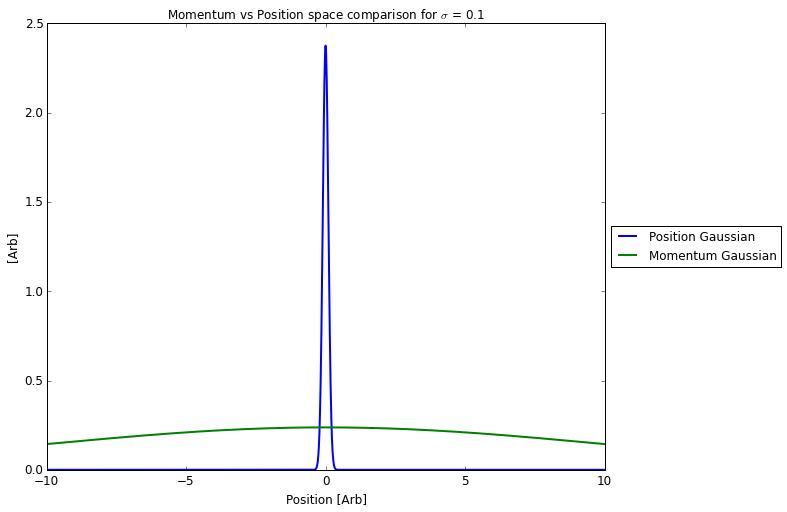

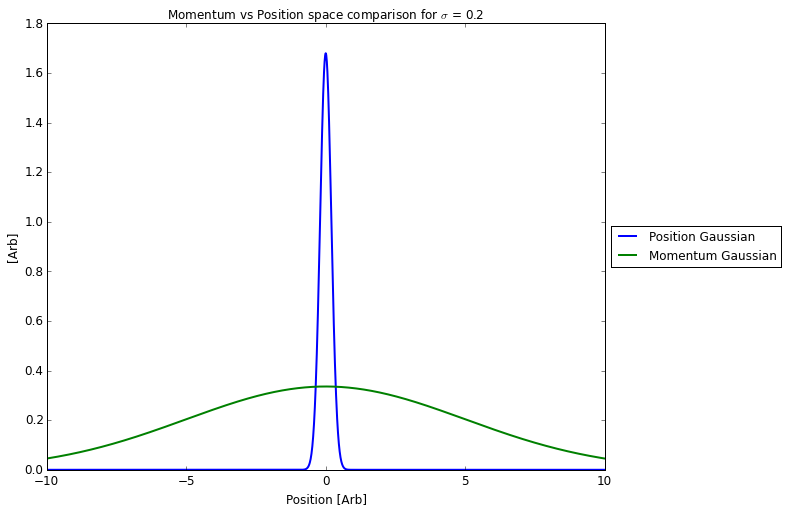

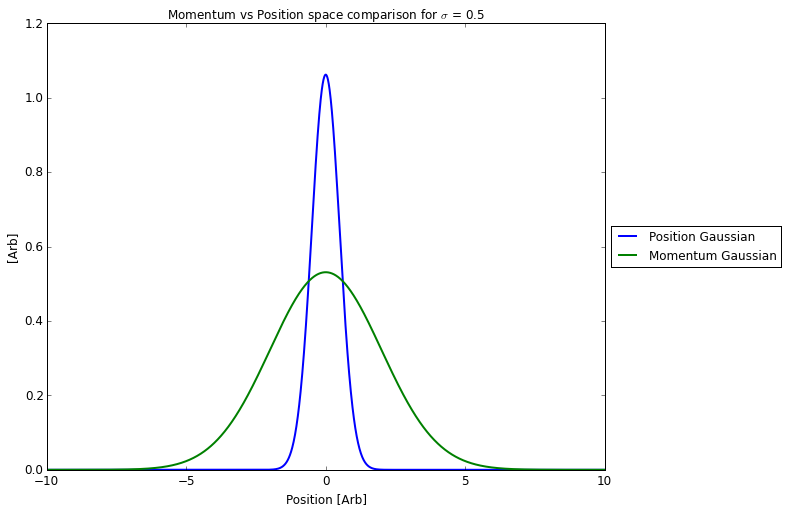

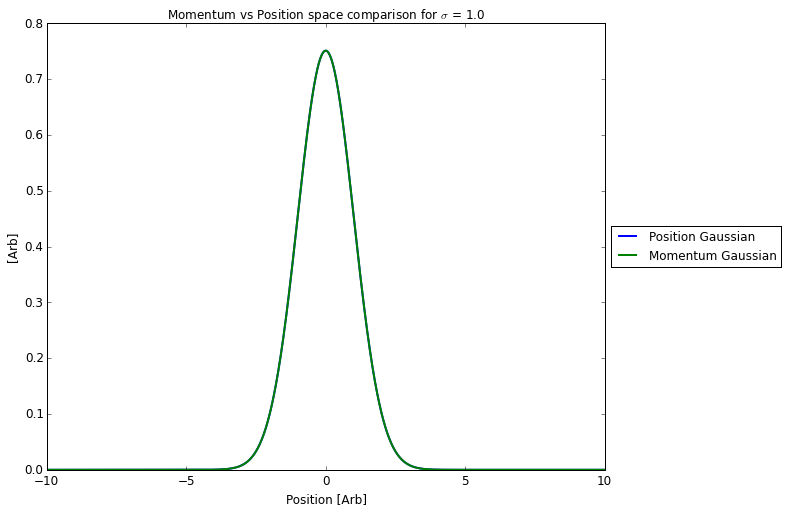

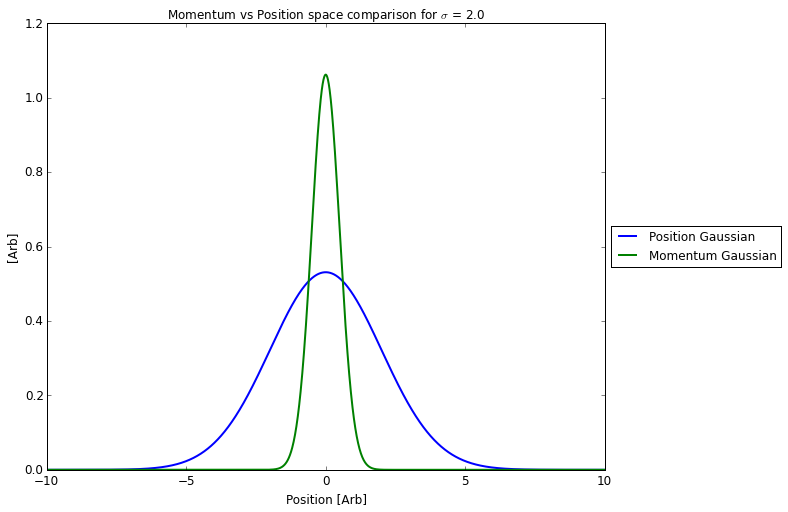

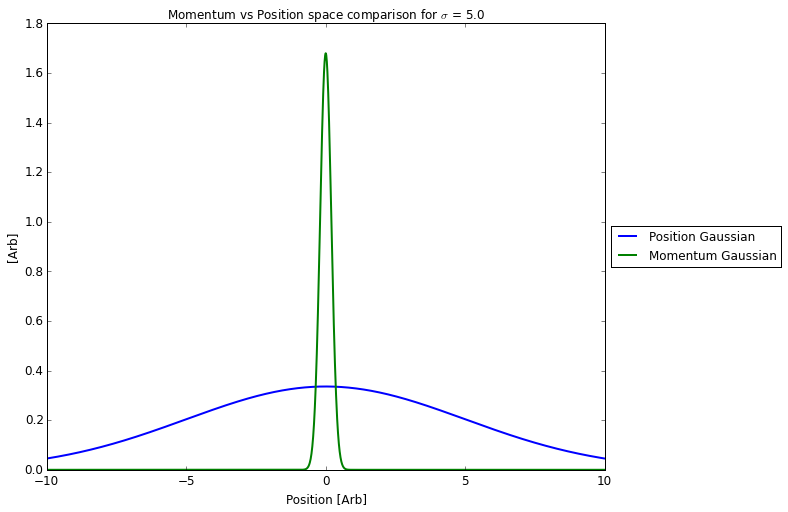

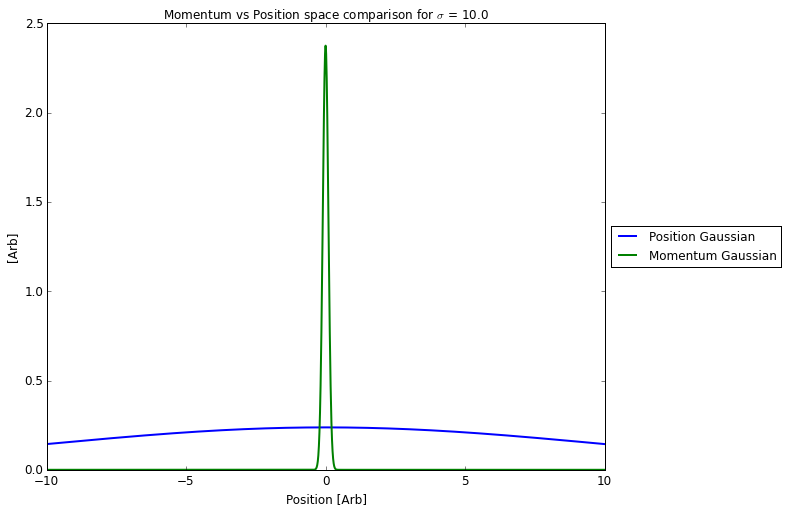

In [10]:
x = np.arange(-10.0, 10.0, 0.01)
sigma_array = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]

for sigma in sigma_array:
    qworld.my_plotting_function(x,
                                  [gaussian_x(x, sigma), gaussian_p(x, sigma)],
                                  ['Position Gaussian', 'Momentum Gaussian'],
                                  title='Momentum vs Position space comparison for $\sigma$ = '+str(sigma),
                                  xlab='Position [Arb]',
                                  ylab='[Arb]')

Now, you're going to compute the uncertainty of a general wavepacket. Recall that the uncertainty principle states
$$ \Delta x \Delta p \le \frac{\hbar}{2},$$
where
$$\Delta x = \sqrt{ \langle x^2 \rangle - \langle x \rangle^2},$$
and
$$\Delta p = \sqrt{ \langle p^2 \rangle - \langle p \rangle^2}.$$

We will do this by first computing the expectation values of the position and position squared. We'll have to compute two integrals:
$$ \langle x \rangle = \int_{-\infty}^{\infty} \psi_0(x)^\dagger x \psi_0(x) dx $$
and
$$ \langle x^2 \rangle = \int_{-\infty}^{\infty} \psi_0(x)^\dagger x^2 \psi_0(x) dx.$$

Write two functions that return the inner part of each integral and then use integrate.quad in the following way: integrate.quad(x_exp, -np.inf, np.inf, args=(1.0))[0].

Finally, compute DeltaX using the formula above.

In [11]:
def x_exp(x, sigma):
    return gaussian_x(x, sigma)*x*gaussian_x(x, sigma)

def x2_exp(x, sigma):
    return gaussian_x(x, sigma)*x*x*gaussian_x(x, sigma)

exp_x = integrate.quad(x_exp, -np.inf, np.inf, args=(1.0))[0]
exp_x2 = integrate.quad(x2_exp, -np.inf, np.inf, args=(1.0))[0]

DeltaX = np.sqrt(exp_x2 - exp_x**2)

We're going to do the same thing for p that we did for x. Note, however, that we're going to do this in the momentum representation. Because we're doing this in the momentum representation, our expectation values are given by wedging a multiplicative factor between two momentum representation wavefunctions, instead of applying the derivative in the position representation.

Like before, we're going to write methods to do the following:
$$ \langle p \rangle = \int_{-\infty}^{\infty} \psi_0(p)^\dagger p \psi_0(p) dp $$
and
$$ \langle p^2 \rangle = \int_{-\infty}^{\infty} \psi_0(p)^\dagger p^2 \psi_0(p) dp.$$

In [12]:
def p_exp(p, sigma):
    return gaussian_p(p, sigma)*p*gaussian_p(p, sigma)

def p2_exp(p, sigma):
    return gaussian_p(p, sigma)*p*p*gaussian_x(p, sigma)

exp_p = integrate.quad(p_exp, -np.inf, np.inf, args=(1.0))[0]
exp_p2 = integrate.quad(p2_exp, -np.inf, np.inf, args=(1.0))[0]

DeltaP = np.sqrt(exp_p2 - exp_p**2)

Finally, compute $\Delta x \Delta p$. What do you get? Note that $\hbar = 1$

In [13]:
print DeltaX*DeltaP

0.5


## <i class="fa fa-wrench"></i> Step 3: Propagate the Wigner density of a gaussian wavepacket in the harmonic oscillator potential.

We will explore the Wigner density in this section, to get a feel for what it means and how it moves. Let's begin by looking at the the Wigner representation of a gaussian wave packet in a harmonic oscillator potential. The formula for this is:

$$f_W(x, p) = \frac{1}{\pi \hbar} e^{-\frac{m \omega}{\hbar } \left( q \right)^2  } e^{-\frac{1}{m \hbar \omega} \left( p \right)^2  } $$

Fill in the function below by translating the formula above into code

In [44]:
def fw_HO(x, p, w, m = 1.0, hbar = 1.0):
    '''
    Returns the wigner representation of a gaussian in a harmonic oscillator potential
    INPUT
    -------------------
    x: scalar or matrix of positions to compute the wigner density on
    p: scalar of matrix of momenta to compute the wigner density on
    w: scalar for the frequency
    
    OUTPUT
    -------------------
    returns the wigner density
    '''
    position = np.exp(-m*w/hbar*(x)**2)
    momentum = np.exp(-(p)**2/(m*w*hbar))
    return position*momentum/(np.pi*hbar)

Now we will plot the wigner function for $\omega=1$

<matplotlib.colorbar.Colorbar instance at 0x7f9ec4bf21b8>

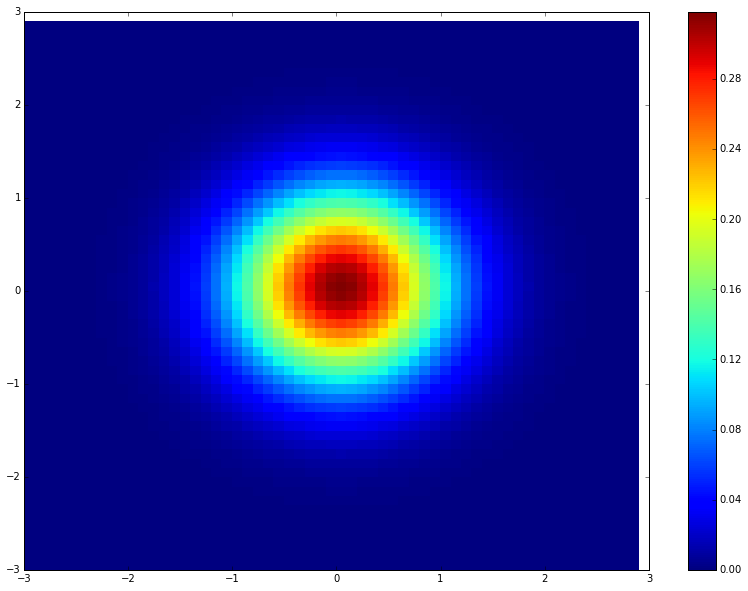

In [18]:
omega = 1.0

x = np.arange(-3.0, 3.0, 0.1)
p = np.arange(-3.0, 3.0, 0.1)
xx, pp = meshgrid(x, p)
# One line, call the function that you wrote up above to plot this thing.
W = fw_HO(xx, pp, omega)

# plotting
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
p = ax.pcolor(xx, pp, W, vmin=abs(W).min(), vmax=abs(W).max())
cb = fig.colorbar(p, ax=ax)

Next, we're going to propagate the wigner density. The centre moves according to the Newtonian equations of motion. That is,
$$x(t) = x_0 \cos(\omega t),$$
and
$$p(t) = p_0 \sin(\omega t).$$

So, to get the time propagation of the wigner density, we just call 

$$f_W(x - x(t), p - p(t)).$$ 

Write a loop to propagate the Wigner distribution in the times perscribed in time_array. We will generate an animation that will show the propagation of the Wigner density.

In [41]:
#import the animation module
from matplotlib import animation

time_array = np.arange(0, 12, 0.1)
x = np.arange(-3.0, 3.0, 0.1)
p = np.arange(-3.0, 3.0, 0.1)
xx, pp = meshgrid(x, p)

# setting figure
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
ax.set_ylabel('Momentum',fontsize=20)
ax.set_xlabel('Position',fontsize=20)

ims = []

for t in time_array:
    xt = 1.0*np.cos(omega*t)
    pt = 1.0*np.sin(omega*t)
    W = fw_HO(xx-xt, pp-pt, omega)
    # Use this to plot
    im = plt.imshow(W,extent=[-3,3,3,-3])
    ttl=plt.title('Wigner density propagation',fontsize=20)
    an = ax.annotate('t='+str(t), xy=(0,0), xytext=(-2.5,2.5), fontsize=20, color='white')
    an.set_animated(True)
    ims.append([im,an,ttl])

anim = animation.ArtistAnimation(fig, ims, interval=1000, blit=True)
qworld.embedAnimation(anim,plt)

## <i class="fa fa-wrench"></i> Step 4: Propagate the Wigner density of the superposition of 2 eigenstates of the harmonic oscillator.<br>

Now we will propagate the Wigner density of the combined ground and first states of te hamornic oscillator to replicate what you were shown in class. To do this, translate the following formula for the Wigner function into the method below:
$$ f_W(x, p, t) = exp^{-x^2 - p^2} \left(  x^2 + p^2 + \sqrt{2} x cos(t) - \sqrt{2} p sin(t)  \right) $$

In [42]:
def fw_HO_01(x, p, t, w, m = 1.0, hbar = 1.0):
    '''
    Returns the wigner representation of a superposition of the first excited and ground state
    of a harmonic oscillator potential
    INPUT
    -------------------
    x: scalar or matrix of positions to compute the wigner density on
    p: scalar of matrix of momenta to compute the wigner density on
    w: scalar for the frequency
    t: scalar for the time
    
    OUTPUT
    -------------------
    returns the wigner density
    '''
    u = pp**2 + xx**2
    fw = np.exp(-u)*(u + np.sqrt(2)*x*np.cos(t) - np.sqrt(2)*pp*np.sin(t))
    return fw

Now let's animate the propagation:

In [43]:
#import the animation module
from matplotlib import animation

time_array = np.arange(0, 12, 0.1)
x = np.arange(-3.0, 3.0, 0.1)
p = np.arange(-3.0, 3.0, 0.1)
xx, pp = meshgrid(x, p)

# setting figure
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
ax.set_ylabel('Momentum',fontsize=20)
ax.set_xlabel('Position',fontsize=20)

ims = []

for t in time_array:
    xt = 1.0*np.cos(omega*t)
    pt = 1.0*np.sin(omega*t)
    W = fw_HO_01(xx, pp, t, omega)
    # Use this to plot
    im = plt.imshow(W,extent=[-3,3,3,-3])
    ttl=plt.title('Wigner density propagation',fontsize=20)
    an = ax.annotate('t='+str(t), xy=(0,0), xytext=(-2.5,2.5), fontsize=20, color='white')
    an.set_animated(True)
    ims.append([im,an,ttl])

anim = animation.ArtistAnimation(fig, ims, interval=1000, blit=True)
qworld.embedAnimation(anim,plt)